# Experiment: Water Management Strategies

Water Management is a complex topic. It involves many different actors, from the government to the private sector, and many different strategies, from water pricing to water reuse. In this experiment, we will explore the different strategies that countries have adopted to manage their water resources.

Especially, Waste Water Treatment and Reuse are important topics.

In [16]:
import os
import sys

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

from src.aquastat_plot import plot_growth_rate
from src.aquastat_utils import *

# Import AQUASTAT
aquastat_df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/projects/test/team-aqua/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from tueplots import bundles

from src.utils import to_dat_path

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 300})

In [18]:
'''Define colormaps'''

# Define the colors for 'bad', 'okay', and 'good'
rog = [(0.0, 'green'),  # Good
       (0.5, 'orange'),  # Okay
       (1.0, 'red')]  # Bad
rog_cmap = LinearSegmentedColormap.from_list('rog', rog)

# Wastewater CMAP
wastewater = {
    'red': ((0.0, 0.0, 0.0),  # Dark blue for good quality
            (0.5, 0.5, 0.5),  # Grey for treated/acceptable
            (1.0, 0.5, 0.5)),  # Brown/red for polluted

    'green': ((0.0, 0.0, 0.0),
              (0.5, 0.5, 0.5),
              (1.0, 0.0, 0.0)),

    'blue': ((0.0, 0.3, 0.3),  # Keeping blue a bit higher for the middle range
             (0.5, 0.5, 0.5),
             (1.0, 0.0, 0.0))
}

# Create the colormap using the dictionary
wastewater_cmap = LinearSegmentedColormap('waste', segmentdata=wastewater, N=256)

In [19]:
'''Filter variables that are correlated with water management'''
filter_for = ['waste', 'reuse', 'treatment']  # variables interesting for waste water treatment

filtered_columns = [column for column in aquastat_df.columns if any([x in column.lower() for x in filter_for])]
filtered_columns

['% of area equipped for irrigation by direct use of  treated municipal wastewater',
 '% of area equipped for irrigation by direct use of non-treated municipal wastewater',
 'Area equipped for irrigation by direct use of not treated municipal wastewater',
 'Area equipped for irrigation by direct use of treated municipal wastewater',
 'Capacity of the municipal wastewater treatment facilities',
 'Collected municipal wastewater',
 'Direct use of not treated municipal wastewater for irrigation purposes',
 'Direct use of treated municipal wastewater',
 'Direct use of treated municipal wastewater for irrigation purposes',
 'Not treated municipal wastewater',
 'Not treated municipal wastewater discharged (secondary water)',
 'Number of municipal wastewater treatment facilities',
 'Produced municipal wastewater',
 'Treated municipal wastewater',
 'Treated municipal wastewater discharged (secondary water)']

We now have a list of variables related to waste water and treatment. Let's explore them.

In [20]:
# Get for each country the number of municipal wastewater treatment facilities

# Create a new dataframe with only the columns we are interested in
interesting_var = 'Number of municipal wastewater treatment facilities'

waste_df = aquastat_df[['Country', 'Year', interesting_var]]
waste_df = waste_df.dropna()  # Drop rows with missing values
waste_df = waste_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

waste_df

Variable,Country,Year,Number of municipal wastewater treatment facilities
10127,United States of America,2004,16583.0
10126,United States of America,2003,16501.0
10125,United States of America,2002,16419.0
10124,United States of America,2001,16337.0
10123,United States of America,2000,16255.0
...,...,...,...
9710,Turkmenistan,2015,1.0
9711,Turkmenistan,2016,1.0
9712,Turkmenistan,2017,1.0
9713,Turkmenistan,2018,1.0


The total number is not very interesting to us so lets look at facilities per capita.
We dont want to look at to small numbers so per 1000 people seems appropriate

In [21]:
'''Get facilities per n citizens'''
waste_df['Total population'] = aquastat_df['Total population']
n = 1000
waste_df[f'{interesting_var} per {n} citizens'] = (waste_df[interesting_var] / (
        waste_df['Total population'] * 1000)) * n
waste_df

Variable,Country,Year,Number of municipal wastewater treatment facilities,Total population,Number of municipal wastewater treatment facilities per 1000 citizens
10127,United States of America,2004,16583.0,292354.658,0.056722
10126,United States of America,2003,16501.0,289815.562,0.056936
10125,United States of America,2002,16419.0,287279.318,0.057153
10124,United States of America,2001,16337.0,284607.993,0.057402
10123,United States of America,2000,16255.0,281710.909,0.057701
...,...,...,...,...,...
9710,Turkmenistan,2015,1.0,5565.287,0.000180
9711,Turkmenistan,2016,1.0,5662.368,0.000177
9712,Turkmenistan,2017,1.0,5757.667,0.000174
9713,Turkmenistan,2018,1.0,5850.901,0.000171


Plot the development of the number of facilities over time

Saving figure to fig/water_management/fig_growth_rate_Number_of_municipal_wastewater_treatment_facilities.pdf ... Done!


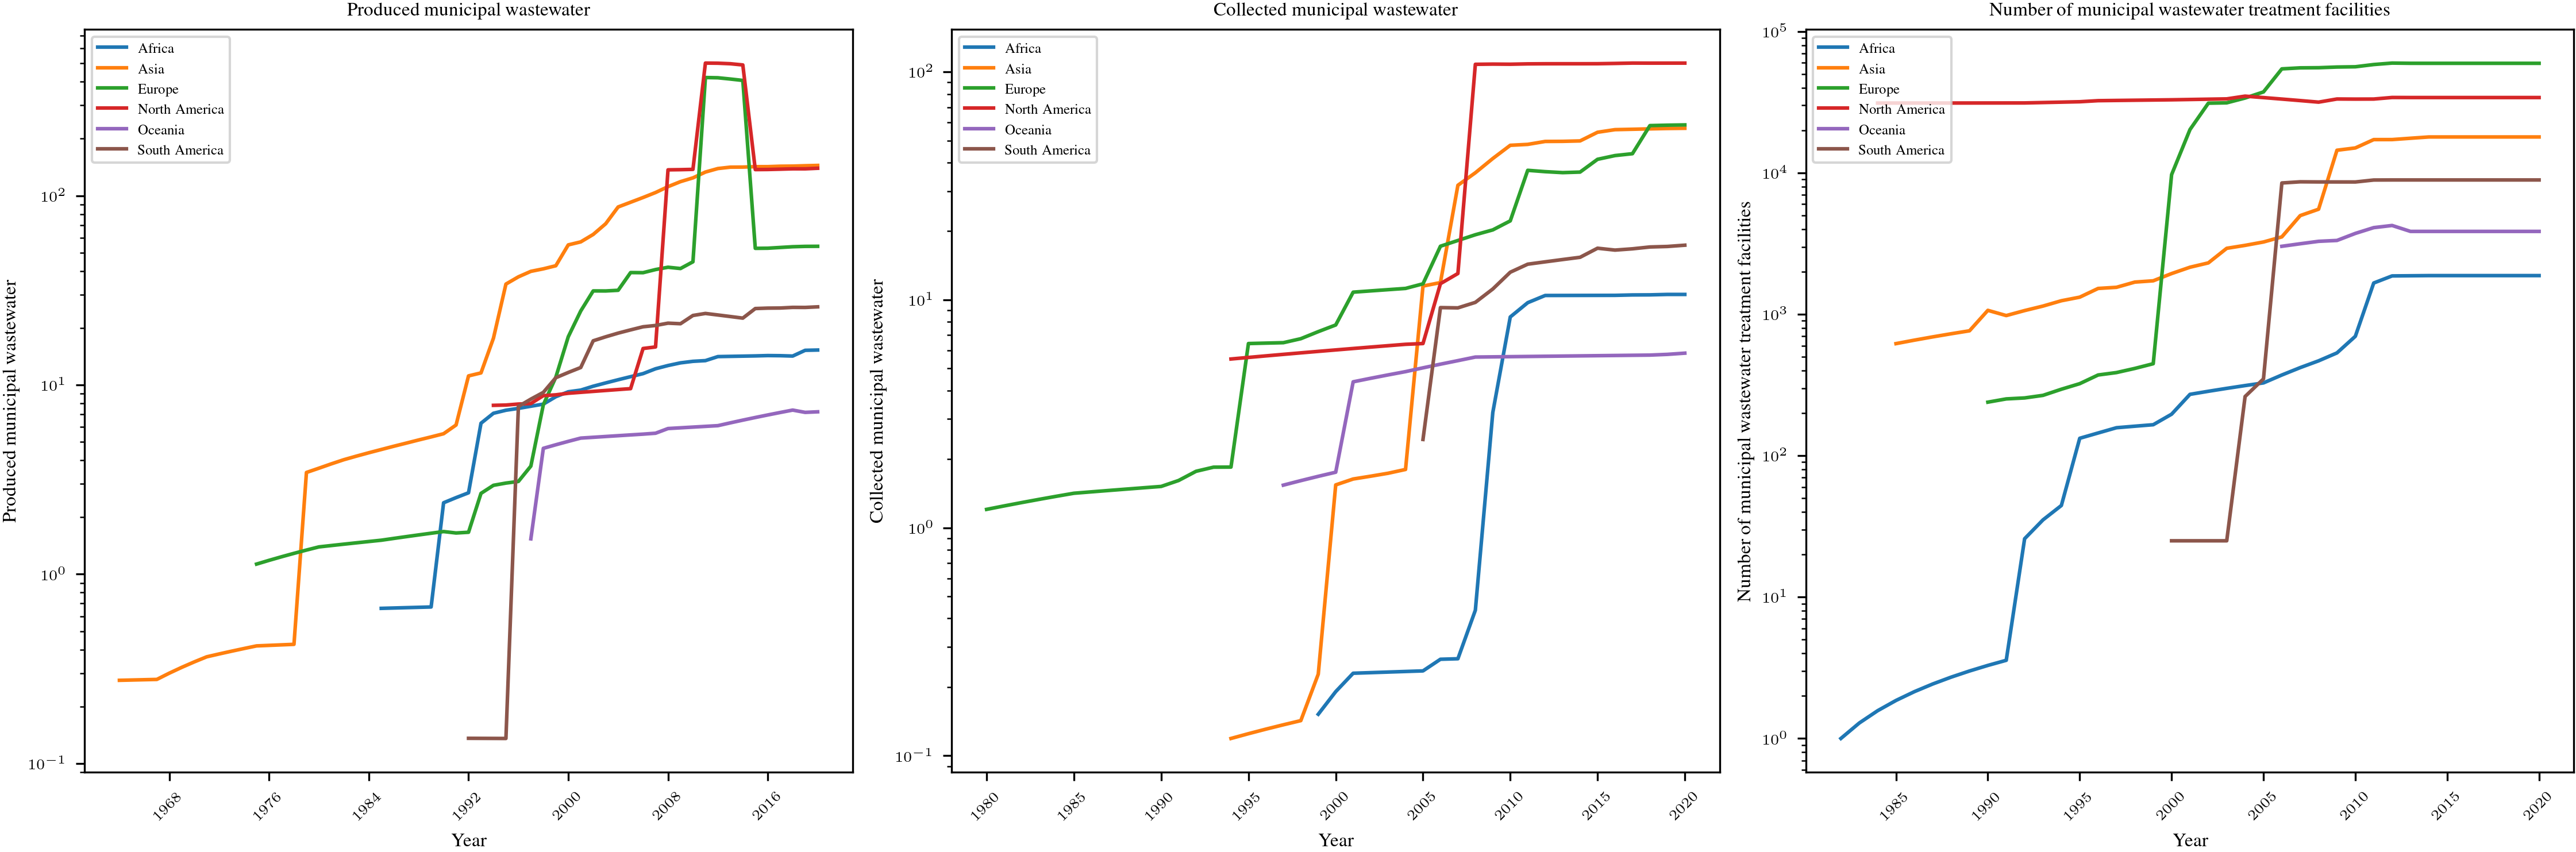

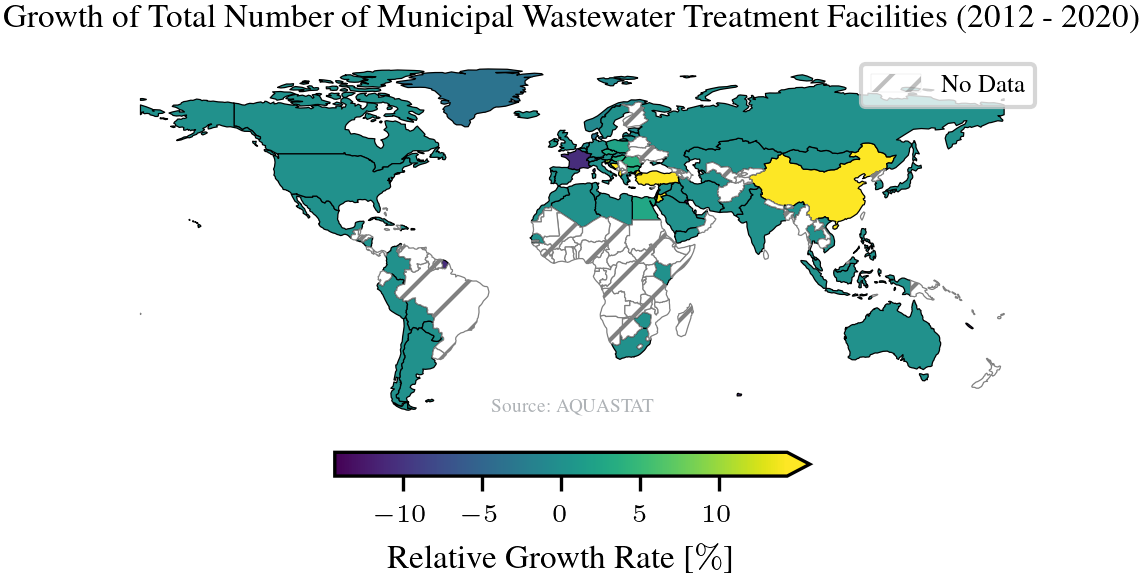

(<Figure size 975x602.583 with 2 Axes>,
 [<Axes: title={'center': 'Growth of Total Number of Municipal Wastewater Treatment Facilities (2012 - 2020)'}>])

In [22]:
plot_growth_rate(
    waste_df,
    'Number of municipal wastewater treatment facilities',
    'viridis',
    'Total Number of Municipal Wastewater Treatment Facilities'
)

It's odd to see that so many countries have a negative (redish) or a stagnant (dark grey) growth rate which means they stopped building facilities in the last years. Is there a reason for that? Maybe the water stress did not increase in these countries?

Water stress (SDG 6.4.2) is defined as the ratio of total water withdrawals to available renewable freshwater resources.

In [23]:
# Filter interesting variables
filter_for = ['stress']

filtered_columns = [column for column in aquastat_df.columns if any([x in column.lower() for x in filter_for])]
filtered_columns

['SDG 6.4.2. Water Stress']

In [24]:
# Plot the water quality for each country
# The countries that have a negative slope and a bad water quality, are the ones we are interested in

# Create a new dataframe with only the columns we are interested in
interesting_var = 'SDG 6.4.2. Water Stress'

stress_df = aquastat_df[['Country', 'Year', interesting_var]]
stress_df = stress_df.dropna()  # Drop rows with missing values
stress_df = stress_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

stress_df

Variable,Country,Year,SDG 6.4.2. Water Stress
5044,Kuwait,2018,3850.500000
5046,Kuwait,2020,3850.500000
5045,Kuwait,2019,3850.500000
5043,Kuwait,2017,3850.500000
5042,Kuwait,2016,3575.000000
...,...,...,...
2081,Republic of the Congo,1991,0.024821
2080,Republic of the Congo,1990,0.024582
2079,Republic of the Congo,1989,0.024344
2078,Republic of the Congo,1988,0.024105


Saving figure to fig/water_management/fig_growth_rate_SDG_6.4.2._Water_Stress.pdf ... Done!


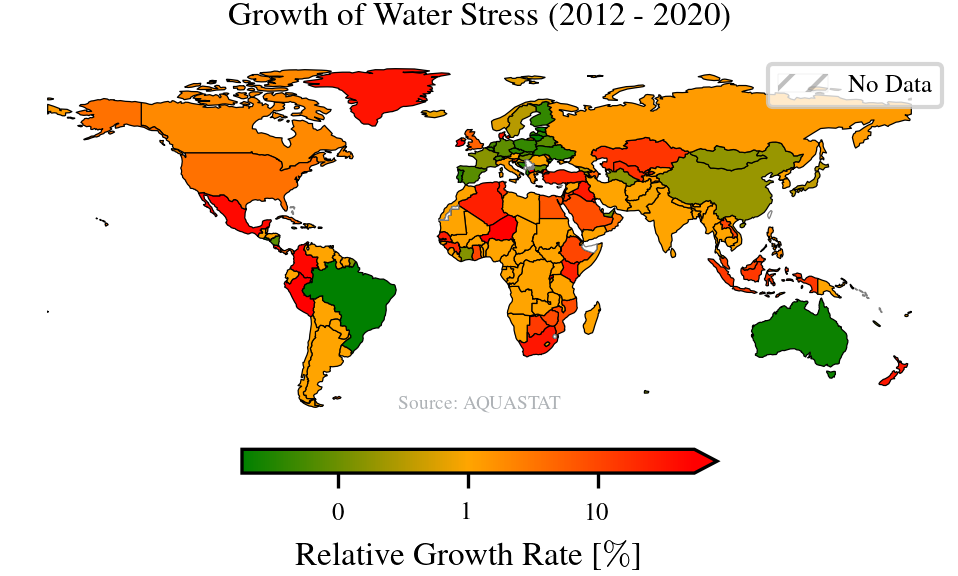

(<Figure size 975x602.583 with 2 Axes>,
 [<Axes: title={'center': 'Growth of Water Stress (2012 - 2020)'}>])

In [25]:
plot_growth_rate(
    stress_df,
    'SDG 6.4.2. Water Stress',
    rog_cmap,
    'Water Stress',
    log_scale=True
)

it could be also interesting to look how their wastewater output has changed.

In [26]:
# Create a new dataframe with only the columns we are interested in
interesting_var = 'Produced municipal wastewater'

wwater_df = aquastat_df[['Country', 'Year', interesting_var]]
wwater_df = wwater_df.dropna()  # Drop rows with missing values
wwater_df = wwater_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

wwater_df

Variable,Country,Year,Produced municipal wastewater
2614,Denmark,2011,364.4770
2615,Denmark,2012,363.8300
2616,Denmark,2013,360.8530
2617,Denmark,2014,353.6670
10143,United States of America,2020,60.4100
...,...,...,...
6041,Mauritius,2016,0.0006
6043,Mauritius,2018,0.0006
6044,Mauritius,2019,0.0006
6045,Mauritius,2020,0.0006


Saving figure to fig/water_management/fig_growth_rate_Produced_municipal_wastewater.pdf ... Done!


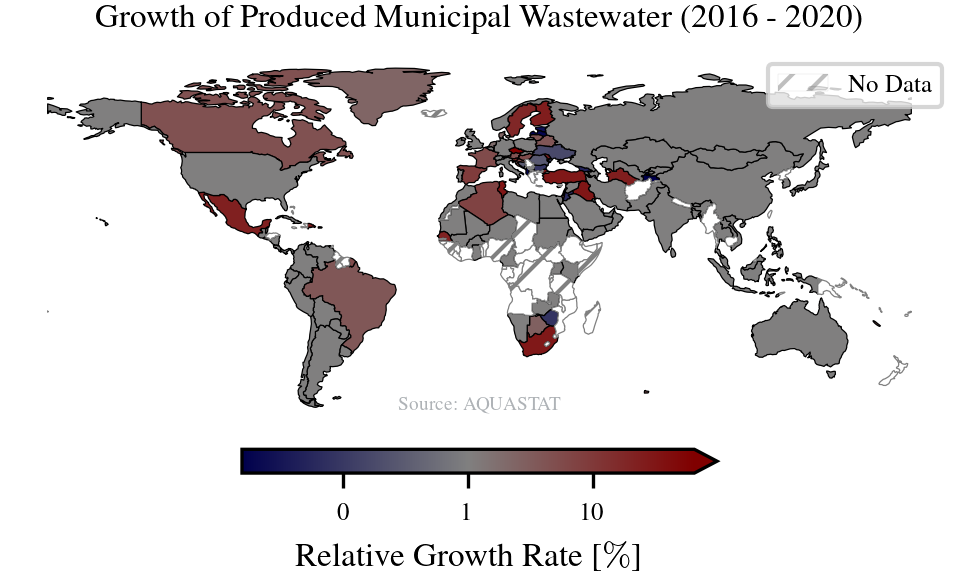

(<Figure size 975x602.583 with 2 Axes>,
 [<Axes: title={'center': 'Growth of Produced Municipal Wastewater (2016 - 2020)'}>])

In [27]:
plot_growth_rate(
    wwater_df,
    interesting_var,
    wastewater_cmap,
    'Produced Municipal Wastewater',
    log_scale=True
)

What we see is that most countries don't face a change in produced waste water.

In [28]:
# Prepare the DataFrame with wastewater information
def get_data_by_continent(aquastat_df: pd.DataFrame, variable: str):
    data = aquastat_df[['Country', 'Year', variable]]
    data = data.dropna()

    # Load the world map GeoDataFrame
    world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")

    # Join the data with the world map
    combined_data = world.merge(data, left_on='SOVEREIGNT', right_on='Country')

    # Drop unnecessary columns
    combined_data = combined_data[['CONTINENT', 'Year', variable, 'POP_EST']]

    # Group by 'CONTINENT' and 'Year', then sum the numeric data
    grouped_data = combined_data.groupby(['CONTINENT', 'Year']).sum()

    # Normalize by land area
    grouped_data[variable]  #/= grouped_data['POP_EST']

    # Reset index to turn 'CONTINENT' and 'Year' into columns
    grouped_data = grouped_data.reset_index()

    # Aggregate the geometric data by 'CONTINENT' using dissolve
    geometric_data = world.dissolve(by='CONTINENT').reset_index()

    # Merge the aggregated numeric data back with the geometric data
    final_data = geometric_data.merge(grouped_data, on='CONTINENT')

    # Keep only the required columns
    data = final_data[['CONTINENT', 'Year', 'geometry', variable]]
    return data



In [29]:
# Create 3 plots: Production, Collection, Treatment

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Produced municipal wastewater
# Remove the 'Seven seas (open ocean)' continent
produced_municipal_wastewater = get_data_by_continent(aquastat_df, 'Produced municipal wastewater')
produced_municipal_wastewater = produced_municipal_wastewater[
    produced_municipal_wastewater['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=produced_municipal_wastewater, x='Year', y='Produced municipal wastewater', hue='CONTINENT',
             ax=axs[0])

# Axes settings
axs[0].set_yscale('log')
axs[0].set_ylabel('Produced municipal wastewater')
axs[0].set_title('Produced municipal wastewater')
axs[0].legend(loc='upper left')
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))

# Plot 2: Collected municipal wastewater
collected_municipal_wastewater = get_data_by_continent(aquastat_df, 'Collected municipal wastewater')
collected_municipal_wastewater = collected_municipal_wastewater[
    collected_municipal_wastewater['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=collected_municipal_wastewater, x='Year', y='Collected municipal wastewater', hue='CONTINENT',
             ax=axs[1])

# Axes settings
axs[1].set_yscale('log')
axs[1].set_ylabel('Collected municipal wastewater')
axs[1].set_title('Collected municipal wastewater')
axs[1].legend(loc='upper left')
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(10))

# Plot 3: Number of municipal wastewater treatment facilities
number_of_municipal_wastewater_treatment_facilities = get_data_by_continent(aquastat_df,
                                                                            'Number of municipal wastewater treatment facilities')
number_of_municipal_wastewater_treatment_facilities = number_of_municipal_wastewater_treatment_facilities[
    number_of_municipal_wastewater_treatment_facilities['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=number_of_municipal_wastewater_treatment_facilities, x='Year',
             y='Number of municipal wastewater treatment facilities', hue='CONTINENT', ax=axs[2])

# Axes settings
axs[2].set_yscale('log')
axs[2].set_ylabel('Number of municipal wastewater treatment facilities')
axs[2].set_title('Number of municipal wastewater treatment facilities')
axs[2].legend(loc='upper left')
axs[2].xaxis.set_tick_params(rotation=45)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(10))